In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 10

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


21/31 [===================>..........] - ETA: 0s - loss: 2.1856 - accuracy: 0.2121
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 2s 18ms/step - loss: 2.1280 - accuracy: 0.2449 - val_loss: 1.9152 - val_accuracy: 0.3501
Epoch 2/1000
17/31 [===============>..............] - ETA: 0s - loss: 1.8732 - accuracy: 0.3208

C:\Users\prera\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 7ms/step - loss: 1.8214 - accuracy: 0.3273 - val_loss: 1.6299 - val_accuracy: 0.4345
Epoch 3/1000
19/31 [=================>............] - ETA: 0s - loss: 1.6733 - accuracy: 0.3372
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 7ms/step - loss: 1.6424 - accuracy: 0.3469 - val_loss: 1.4597 - val_accuracy: 0.4431
Epoch 4/1000
30/31 [============================>.] - ETA: 0s - loss: 1.5245 - accuracy: 0.3865
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 8ms/step - loss: 1.5221 - accuracy: 0.3883 - val_loss: 1.3494 - val_accuracy: 0.4841
Epoch 5/1000
26/31 [========================>.....] - ETA: 0s - loss: 1.4607 - accuracy: 0.4192
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [=============

31/31 [==============================] - 0s 6ms/step - loss: 0.9354 - accuracy: 0.6407 - val_loss: 0.6127 - val_accuracy: 0.8366
Epoch 30/1000
19/31 [=================>............] - ETA: 0s - loss: 0.9099 - accuracy: 0.6608
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 6ms/step - loss: 0.9107 - accuracy: 0.6564 - val_loss: 0.6038 - val_accuracy: 0.8311
Epoch 31/1000
17/31 [===============>..............] - ETA: 0s - loss: 0.9474 - accuracy: 0.6305
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 6ms/step - loss: 0.9407 - accuracy: 0.6404 - val_loss: 0.5974 - val_accuracy: 0.8575
Epoch 32/1000
19/31 [=================>............] - ETA: 0s - loss: 0.9117 - accuracy: 0.6484
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 6ms/step - loss: 0.9144 - accuracy: 0.6523 - va

Epoch 57/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.8157 - accuracy: 0.6944
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 8ms/step - loss: 0.8274 - accuracy: 0.6903 - val_loss: 0.4551 - val_accuracy: 0.8954
Epoch 58/1000
19/31 [=================>............] - ETA: 0s - loss: 0.8020 - accuracy: 0.7089
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 6ms/step - loss: 0.8010 - accuracy: 0.7091 - val_loss: 0.4513 - val_accuracy: 0.8970
Epoch 59/1000
18/31 [================>.............] - ETA: 0s - loss: 0.7734 - accuracy: 0.7144
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 6ms/step - loss: 0.7829 - accuracy: 0.7171 - val_loss: 0.4447 - val_accuracy: 0.8947
Epoch 60/1000
20/31 [==================>...........] - ETA: 0s - loss: 0.8025 - accuracy: 0

22/31 [====================>.........] - ETA: 0s - loss: 0.7753 - accuracy: 0.7180
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.7686 - accuracy: 0.7140 - val_loss: 0.3988 - val_accuracy: 0.8993
Epoch 85/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.7453 - accuracy: 0.7281
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.7522 - accuracy: 0.7251 - val_loss: 0.3995 - val_accuracy: 0.9055
Epoch 86/1000
28/31 [==========================>...] - ETA: 0s - loss: 0.7617 - accuracy: 0.7254
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.7640 - accuracy: 0.7231 - val_loss: 0.3981 - val_accuracy: 0.9063
Epoch 87/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.7464 - accuracy: 0.7188
Epoch 87

22/31 [====================>.........] - ETA: 0s - loss: 0.7361 - accuracy: 0.7259
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 6ms/step - loss: 0.7395 - accuracy: 0.7272 - val_loss: 0.3635 - val_accuracy: 0.9109
Epoch 112/1000
27/31 [=========================>....] - ETA: 0s - loss: 0.7390 - accuracy: 0.7231
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 9ms/step - loss: 0.7332 - accuracy: 0.7267 - val_loss: 0.3626 - val_accuracy: 0.9040
Epoch 113/1000
26/31 [========================>.....] - ETA: 0s - loss: 0.7314 - accuracy: 0.7230
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 9ms/step - loss: 0.7235 - accuracy: 0.7275 - val_loss: 0.3668 - val_accuracy: 0.9055
Epoch 114/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.7369 - accuracy: 0.7204
Ep

Epoch 138/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.6834 - accuracy: 0.7484
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.7422 - val_loss: 0.3464 - val_accuracy: 0.9070
Epoch 139/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.7067 - accuracy: 0.7472
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 9ms/step - loss: 0.7117 - accuracy: 0.7401 - val_loss: 0.3477 - val_accuracy: 0.9086
Epoch 140/1000
20/31 [==================>...........] - ETA: 0s - loss: 0.7175 - accuracy: 0.7176
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 7ms/step - loss: 0.7283 - accuracy: 0.7220 - val_loss: 0.3569 - val_accuracy: 0.9086
Epoch 141/1000
26/31 [========================>.....] - ETA: 0s - loss: 0.7085 - accu

Epoch 165/1000
22/31 [====================>.........] - ETA: 0s - loss: 0.6853 - accuracy: 0.7362
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 6ms/step - loss: 0.6756 - accuracy: 0.7378 - val_loss: 0.3330 - val_accuracy: 0.9163
Epoch 166/1000
19/31 [=================>............] - ETA: 0s - loss: 0.6942 - accuracy: 0.7504
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6974 - accuracy: 0.7484 - val_loss: 0.3357 - val_accuracy: 0.9233
Epoch 167/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.6788 - accuracy: 0.7489
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.7484 - val_loss: 0.3301 - val_accuracy: 0.9187
Epoch 168/1000
20/31 [==================>...........] - ETA: 0s - loss: 0.6734 - accu

Epoch 192/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.6903 - accuracy: 0.7513
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 8ms/step - loss: 0.6874 - accuracy: 0.7520 - val_loss: 0.3186 - val_accuracy: 0.9311
Epoch 193/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.6630 - accuracy: 0.7491
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 9ms/step - loss: 0.6736 - accuracy: 0.7461 - val_loss: 0.3146 - val_accuracy: 0.9318
Epoch 194/1000
26/31 [========================>.....] - ETA: 0s - loss: 0.6809 - accuracy: 0.7473
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 9ms/step - loss: 0.6792 - accuracy: 0.7448 - val_loss: 0.3167 - val_accuracy: 0.9303
Epoch 195/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.6890 - accu

Epoch 219/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.6508 - accuracy: 0.7566
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 8ms/step - loss: 0.6616 - accuracy: 0.7561 - val_loss: 0.3042 - val_accuracy: 0.9365
Epoch 220/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.6589 - accuracy: 0.7550
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 7ms/step - loss: 0.6566 - accuracy: 0.7551 - val_loss: 0.3075 - val_accuracy: 0.9396
Epoch 221/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.6645 - accuracy: 0.7497
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 9ms/step - loss: 0.6684 - accuracy: 0.7479 - val_loss: 0.3048 - val_accuracy: 0.9411
Epoch 222/1000
26/31 [========================>.....] - ETA: 0s - loss: 0.6688 - accu

Epoch 246/1000
26/31 [========================>.....] - ETA: 0s - loss: 0.6343 - accuracy: 0.7758
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 8ms/step - loss: 0.6348 - accuracy: 0.7753 - val_loss: 0.2936 - val_accuracy: 0.9520
Epoch 247/1000
26/31 [========================>.....] - ETA: 0s - loss: 0.6395 - accuracy: 0.7689
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 9ms/step - loss: 0.6333 - accuracy: 0.7724 - val_loss: 0.2952 - val_accuracy: 0.9497
Epoch 248/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.6235 - accuracy: 0.7775
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 8ms/step - loss: 0.6301 - accuracy: 0.7734 - val_loss: 0.2981 - val_accuracy: 0.9473
Epoch 249/1000
20/31 [==================>...........] - ETA: 0s - loss: 0.6425 - accu

Epoch 273/1000
20/31 [==================>...........] - ETA: 0s - loss: 0.6056 - accuracy: 0.7863
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 6ms/step - loss: 0.6140 - accuracy: 0.7807 - val_loss: 0.2983 - val_accuracy: 0.9535
Epoch 274/1000
26/31 [========================>.....] - ETA: 0s - loss: 0.6196 - accuracy: 0.7725
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 9ms/step - loss: 0.6228 - accuracy: 0.7711 - val_loss: 0.3003 - val_accuracy: 0.9497
Epoch 275/1000
26/31 [========================>.....] - ETA: 0s - loss: 0.6310 - accuracy: 0.7731
Epoch 275: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 9ms/step - loss: 0.6229 - accuracy: 0.7740 - val_loss: 0.3019 - val_accuracy: 0.9481
Epoch 276/1000
30/31 [============================>.] - ETA: 0s - loss: 0.6098 - accu

Epoch 300/1000
20/31 [==================>...........] - ETA: 0s - loss: 0.6103 - accuracy: 0.7832
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 6ms/step - loss: 0.6173 - accuracy: 0.7820 - val_loss: 0.2987 - val_accuracy: 0.9466
Epoch 301/1000
23/31 [=====================>........] - ETA: 0s - loss: 0.6139 - accuracy: 0.7775
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6164 - accuracy: 0.7773 - val_loss: 0.2912 - val_accuracy: 0.9481
Epoch 302/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.6203 - accuracy: 0.7747
Epoch 302: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.6158 - accuracy: 0.7745 - val_loss: 0.2823 - val_accuracy: 0.9527
Epoch 303/1000
26/31 [========================>.....] - ETA: 0s - loss: 0.6092 - accu

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 3ms/step - loss: 0.2876 - accuracy: 0.9497


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 183ms/step
[6.2043898e-02 9.1758192e-01 1.9369964e-02 1.6350144e-12 5.9573908e-18
 2.2733989e-19 1.0804849e-12 4.4481793e-19 1.0754086e-08 1.0042780e-03]
1


# Confusion matrix

41/41 [==============================] - 0s 2ms/step


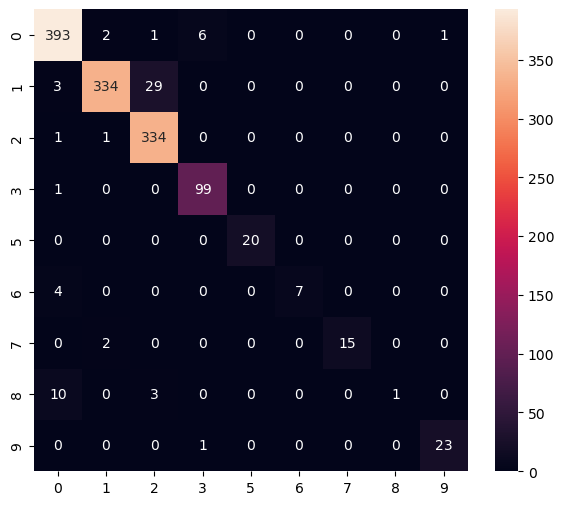

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       403
           1       0.99      0.91      0.95       366
           2       0.91      0.99      0.95       336
           3       0.93      0.99      0.96       100
           5       1.00      1.00      1.00        20
           6       1.00      0.64      0.78        11
           7       1.00      0.88      0.94        17
           8       1.00      0.07      0.13        14
           9       0.96      0.96      0.96        24

    accuracy                           0.95      1291
   macro avg       0.97      0.82      0.85      1291
weighted avg       0.95      0.95      0.95      1291



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\prera\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\prera\AppData\Local\Temp\tmpcm57v03k\assets


INFO:tensorflow:Assets written to: C:\Users\prera\AppData\Local\Temp\tmpcm57v03k\assets


6808

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.2043931e-02 9.1758192e-01 1.9369945e-02 1.6350111e-12 5.9573672e-18
 2.2733898e-19 1.0804848e-12 4.4481958e-19 1.0754086e-08 1.0042775e-03]
1
